## Multiple Linear Regression Analysis with the Kings County House Sales
### Project Overview
For this project, I will be using multiple linear regression modeling to analyze house sales in a northwestern county. I will also report the findings of my final model, including both predictive model performance metrics and interpretation of fitted model parameters

### Objectives

#### Business Understanding

There is the need to provide advice to a stakeholder on what attributes of his/her property to improve so that he/she will benefit and by what amount.

#### Data Understanding
The dataset contains 2197  houses, includes attributes of those houses as well as their prices. 

Some of the features are numerical while others are categorical.Our target for this data is price and other columns are predictors.

I will be preparing the dataset for modelling by preprocessing the numeric and categorical attributes in this dataset,then build a model that will ultimately yield parameters.Interpreting these parameters,should answer the business question

## Getting started
Information on columns:

1.id:unique identified for a house

2.date: date house was sold

3.price: Price is prediction target

4.bedrooms: Number of Bedrooms/House

5.bathrooms: Number of bathrooms/bedrooms

6.sqft_living: square footage of the home

7.sqft_lot: square footage of the lot

8.floors: Total floors (levels) in house

9.waterfront: House which has a view to a waterfront

10.view: Has been viewed

11.condition: How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent.

12.grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.

13.sqft_above: Square footage of house apart from basement

14.sqft_basement: Square footage of the basement

15.yr_built: Year built

16.yr_renovated: Year when house was renovated

17.zipcode: zipcode

18.lat: Latitude coordinate

19.long: Longitude coordinate

20.sqft_living15: Living room area in 2015

21.sqft_lot15: lotSize area in 2015

In [409]:
#Importing relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [410]:
#Loading data

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

exploring sqft_basement column

In [412]:
df.sqft_basement.unique()


array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

we have found the reason sqft_basement is not a numerical variable is because of the ?.I will replace the ? with the columns mean and cast the column to the datatype float

In [413]:
non_q = df.loc[df['sqft_basement']!='?']

In [414]:
non_q.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [415]:
sqft_base = non_q.sqft_basement.astype(float)

mn = sqft_base.mean()
mn,

print('Mean:', mn)


Mean: 291.851723974838


Here we have found the mean of all values in sqft_basement that are not ?.So we now replace the ? with this mean value

In [416]:
df.sqft_basement.replace(to_replace = '?', value = '291.9', inplace=True)

coverting the column to a float

In [417]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '291.9', '730.0', '1700.0',
       '300.0', '970.0', '760.0', '720.0', '700.0', '820.0', '780.0',
       '790.0', '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0',
       '990.0', '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0',
       '1040.0', '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0',
       '540.0', '710.0', '840.0', '380.0', '770.0', '480.0', '570.0',
       '1490.0', '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0',
       '1130.0', '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0',
       '640.0', '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0',
       '430.0', '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0',
       '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0',
       '1150.0', '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0',
       '960.0', '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0',
       '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.

In [418]:
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement.dtype

dtype('float64')

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Date is an object and cannot be converted to a float

In [420]:
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

replacing the missing values in view with the columns mean

In [421]:
df.view = df.view.fillna(df.view.mean)
df.view.isna().sum()


0

Filling missing values of waterfront and yr_renovated with 0

In [422]:
df.waterfront = df.waterfront.fillna(0)
df.yr_renovated = df.yr_renovated.fillna(0)

In [423]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we have no missing values in our dataset

## Investigating assumptions of a linear regression against the dataset

With the knowledge of the assumptions of linear regression,I will test the dataset to determine which attributes of the house best predicts the outcome of our target variable, price

### Investigating Linearity

In [424]:
abs(df.corr()) > 0.74

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False


We select all the true values that have a corr > 0.74,

In [425]:
corr = pd.DataFrame([])
corr['sqft_living'] = df.sqft_living
corr['price'] =  df.price
corr['bathroom'] = df.bathrooms
corr['sqft15'] =  df.sqft_living15
corr['sqabv'] = df.sqft_above
corr['grade'] = df.grade
corr.corr() 

,sqft_living,price,bathroom,sqft15,sqabv,grade
sqft_living,1.000000,0.701917,0.755758,0.756402,0.876448,0.762779
price,0.701917,1.000000,0.525906,0.585241,0.605368,0.667951
bathroom,0.755758,0.525906,1.000000,0.569884,0.686668,0.665838
sqft15,0.756402,0.585241,0.569884,1.000000,0.731767,0.713867
sqabv,0.876448,0.605368,0.686668,0.731767,1.000000,0.756073
grade,0.762779,0.667951,0.665838,0.713867,0.756073,1.000000


The predictor, sqft_living, has the highest collinearity with other predictor variables.It is best to remove this variable but ata the same time sqft_living has the highest correlation with price so instead I'm going to a drop all the other predictors to eliminate multicollinearity.

In [426]:
df = df.drop(['bathrooms', 'sqft_living15', 'sqft_above', 'grade'], axis = 1)



Lets take a preliminary look at histograms and see if we can eliminate some more features

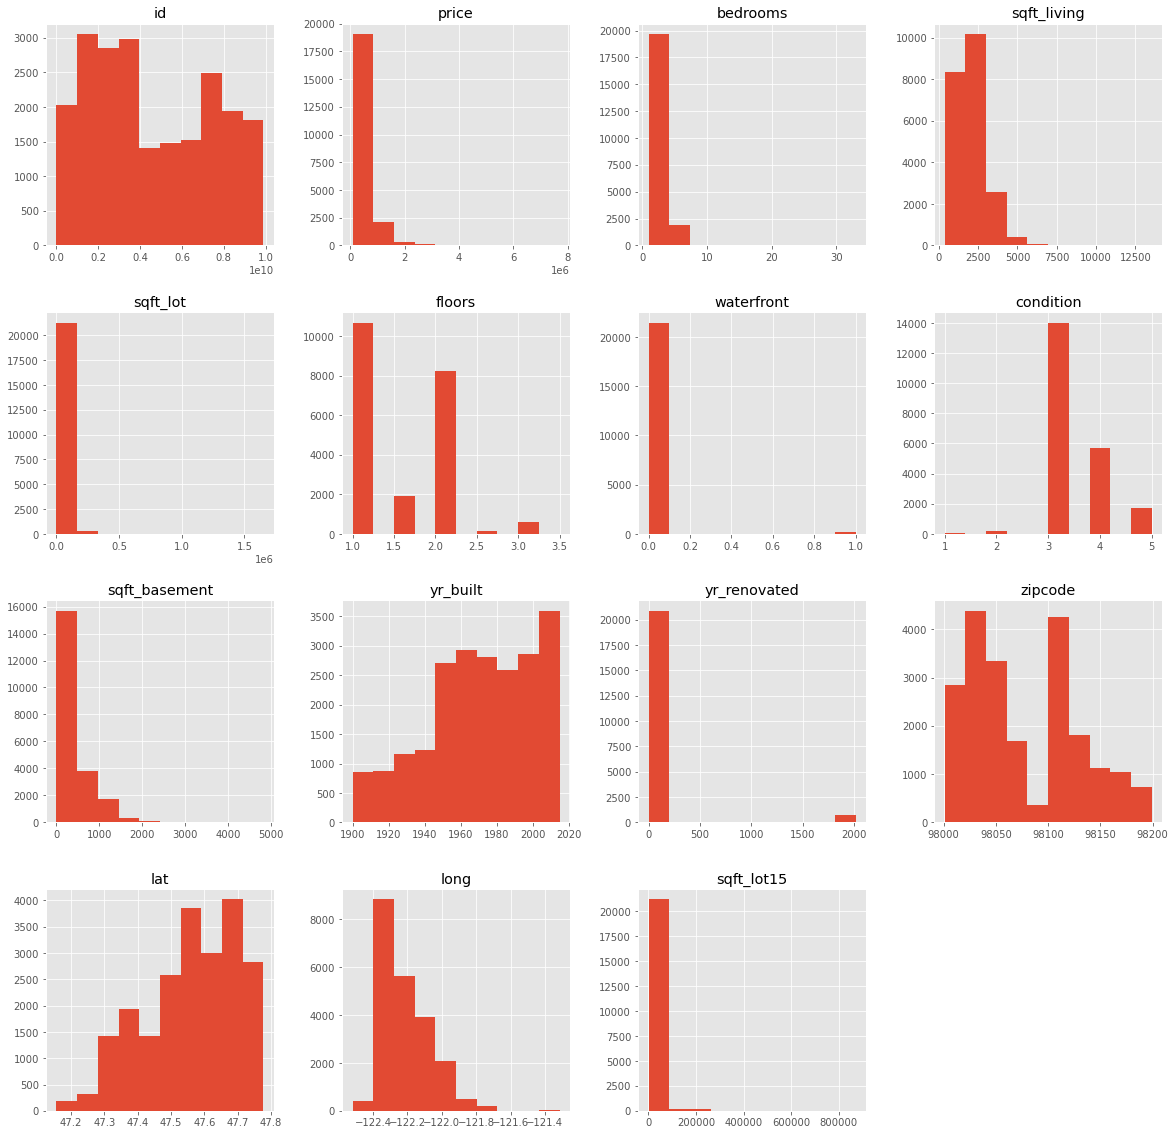

In [427]:
plt.style.use('ggplot')
df.hist(figsize=(20,20));

From the histogram we can see that many values of waterfront asre zero

In [428]:
df['waterfront'].value_counts(normalize = True) 



0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64

In [429]:

df.yr_renovated.value_counts(normalize = True)


0.0       0.965551
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
2007.0    0.001389
            ...   
1946.0    0.000046
1959.0    0.000046
1971.0    0.000046
1951.0    0.000046
1954.0    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [430]:
df.view.value_counts(normalize = True)

0.0                                                                                                                                                                                                                                  0.899292
2.0                                                                                                                                                                                                                                  0.044312
3.0                                                                                                                                                                                                                                  0.023522
1.0                                                                                                                                                                                                                                  0.015280
4.0                                             


Safe to drop waterfront, view, and yr renovated due to majority of the data being logged as 0

In [431]:
df = df.drop(['view', 'waterfront', 'yr_renovated'], axis = 1)

In [432]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

Now lets examine some of the location variables. ie) zipcode, latitude, and longitude

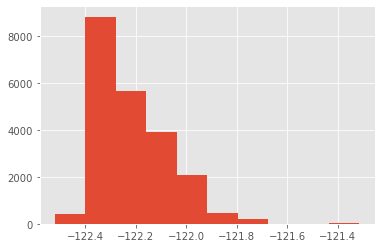

In [433]:
df.long.hist();

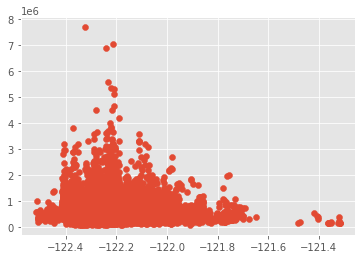

In [434]:
plt.scatter(df.long, df.price);

No clear linearity here, it is therefore safe to drop.

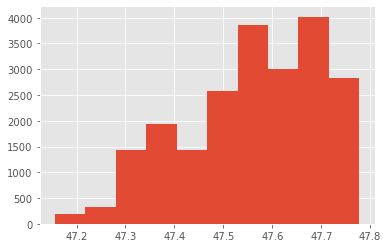

In [435]:
df.lat.hist();

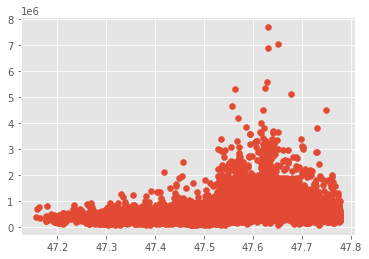

In [436]:
plt.scatter(df.lat, df.price);

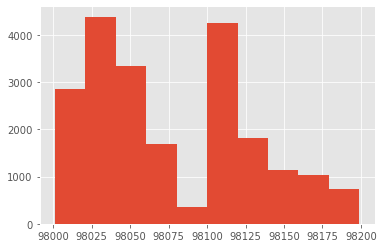

In [437]:
df.zipcode.hist();

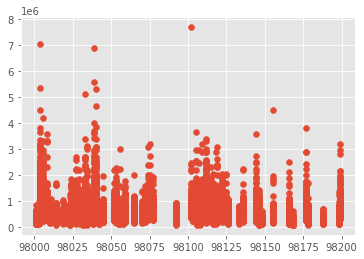

In [438]:
plt.scatter(df.zipcode, df.price);

Again, zero linearity distribution.It is safe to completely drop these predictors

In [439]:
df = df.drop(['zipcode','lat', 'long'], axis = 1)

In [440]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15'],
      dtype='object')

we will drop date  would just be an impossible attribute to work with

In [441]:
df = df.drop(['date'], axis = 1)

In [442]:
df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,sqft_lot15
0,7129300520,221900.0,3,1180,5650,1.0,3,0.0,1955,5650
1,6414100192,538000.0,3,2570,7242,2.0,3,400.0,1951,7639
2,5631500400,180000.0,2,770,10000,1.0,3,0.0,1933,8062
3,2487200875,604000.0,4,1960,5000,1.0,5,910.0,1965,5000
4,1954400510,510000.0,3,1680,8080,1.0,3,0.0,1987,7503


In [443]:
scatter = ['id', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15']

plotting scatter plots for the remaining predictors

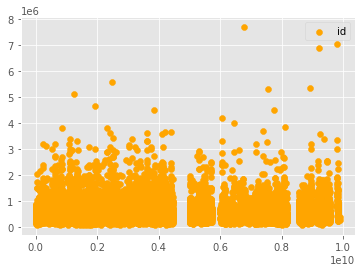

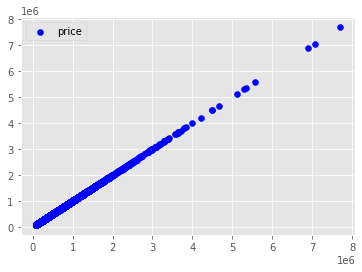

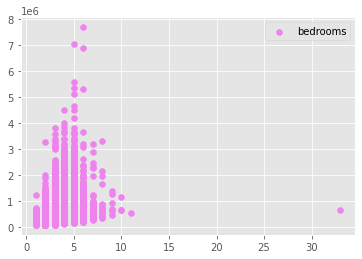

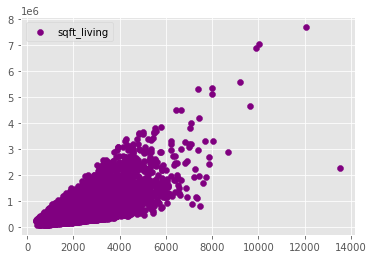

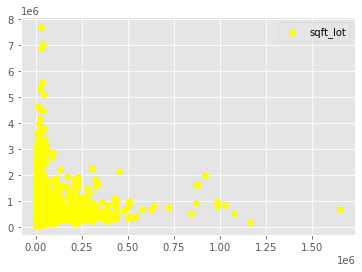

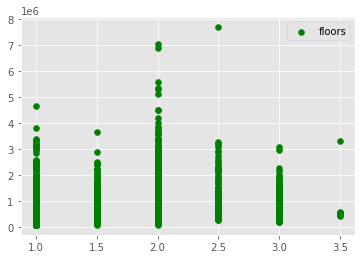

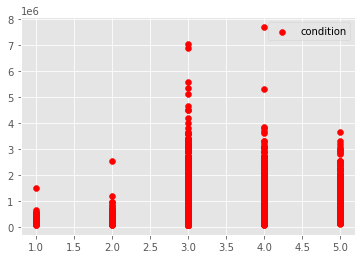

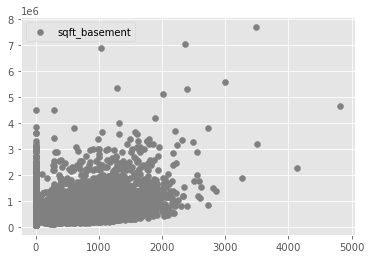

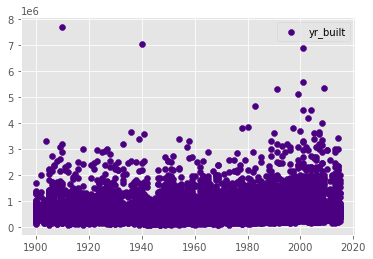

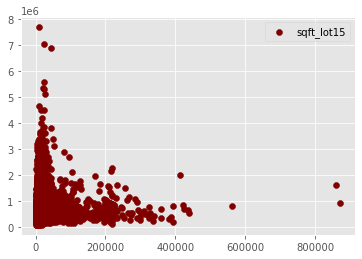

In [444]:
colors = ['orange', 'blue', 'violet', 'purple', 'yellow','green', 'red', 'grey', 'indigo', 'maroon']
i = 0 
for x in scatter:
    plt.scatter(df[x], df.price, label = x, color = colors[i] )
    plt.legend()
    plt.show()
    i+=1

there is no correlation between yr_built and price.So we will drop the variable

there is no correlation between id and price.So the attribute will also be dropped

In [445]:
df = df.drop('yr_built', axis = 1)


In [446]:
df = df.drop('id', axis = 1)



## Investigating Normality

With our remaining predictors we plot histograms to check for normality

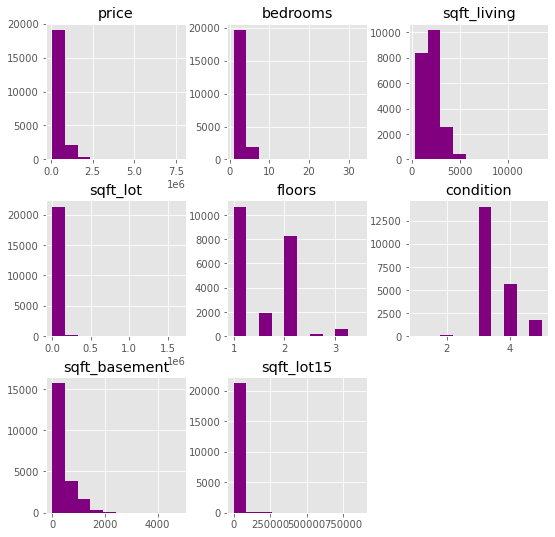

In [447]:
df.hist(figsize = (9,9), color = 'purple');

Okay the distribution for bedrooms, price, sqft_basement, sqft_livng, and sqft_ot need log transformation. Lets change condition into a categorical var and then get around to modeling

In [448]:
data_log = pd.DataFrame([])
data_log['bedrooms'] = np.log(df['bedrooms'])
data_log['floors'] = df['floors']
data_log['sqft_lot'] = np.log(df['sqft_lot'])
data_log['price'] = np.log(df['price'])
data_log['sqft_living'] = np.log(df['sqft_living'])
data_log['sqft_lot15'] = np.log(df['sqft_lot15'])
#data_log['sqft_basement'] = np.log(df.sqft_basement)
data_log['condition'] = df.condition



Because there are zero values for sqft_basement cannot be log normalized because it has many zero values

In [449]:
data_log['sqft_basement'] = df.sqft_basement

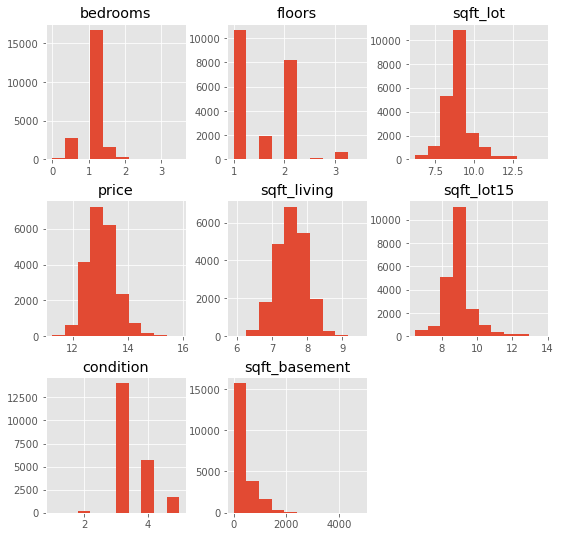

In [450]:
data_log.hist(figsize=(9,9));

Make the condition feature a categorical one variable

In [451]:
condition_dummies = pd.get_dummies(data_log.condition)

In [452]:
data_log.columns


Index(['bedrooms', 'floors', 'sqft_lot', 'price', 'sqft_living', 'sqft_lot15',
       'condition', 'sqft_basement'],
      dtype='object')

In [453]:
data_log = data_log.drop(['condition'], axis = 1)

In [454]:
data_log = pd.concat([data_log, condition_dummies], axis=1)

In [455]:
data_log.head()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement,1,2,3,4,5
0,1.098612,1.0,8.639411,12.309982,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,7.426549,8.923058,0.0,0,0,1,0,0


In [456]:
for cat in data_log.iloc[:,7:].columns:
    data_log[cat] = data_log[cat].astype('category')

In [457]:

data_log = data_log.rename({1:'cond1', 2: 'cond2', 3: 'cond3', 4: 'cond4', 5: 'cond5'}, axis=1)

In [458]:
data_log.head()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement,cond1,cond2,cond3,cond4,cond5
0,1.098612,1.0,8.639411,12.309982,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,7.426549,8.923058,0.0,0,0,1,0,0


# Investigating Homoscedasticity

For the remaining predictors,we will test them under the assumption of homoscedasticity to see which of them best meet these assumption

In [459]:
best_attributes = data_log.copy()

In [460]:
best_attributes = best_attributes.drop(['price'], axis = 1)
best_attributes.head()

,bedrooms,floors,sqft_lot,sqft_living,sqft_lot15,sqft_basement,cond1,cond2,cond3,cond4,cond5
0,1.098612,1.0,8.639411,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,7.426549,8.923058,0.0,0,0,1,0,0


Lets use visualizations to see how our well features meet assumption of Homoscedasticity

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-bedrooms
----------------------------------------------------------------------------------------------------


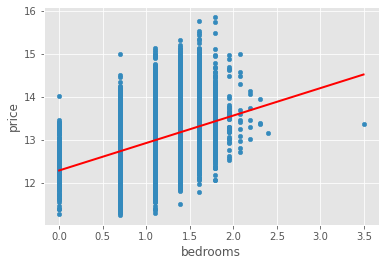

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-floors
----------------------------------------------------------------------------------------------------


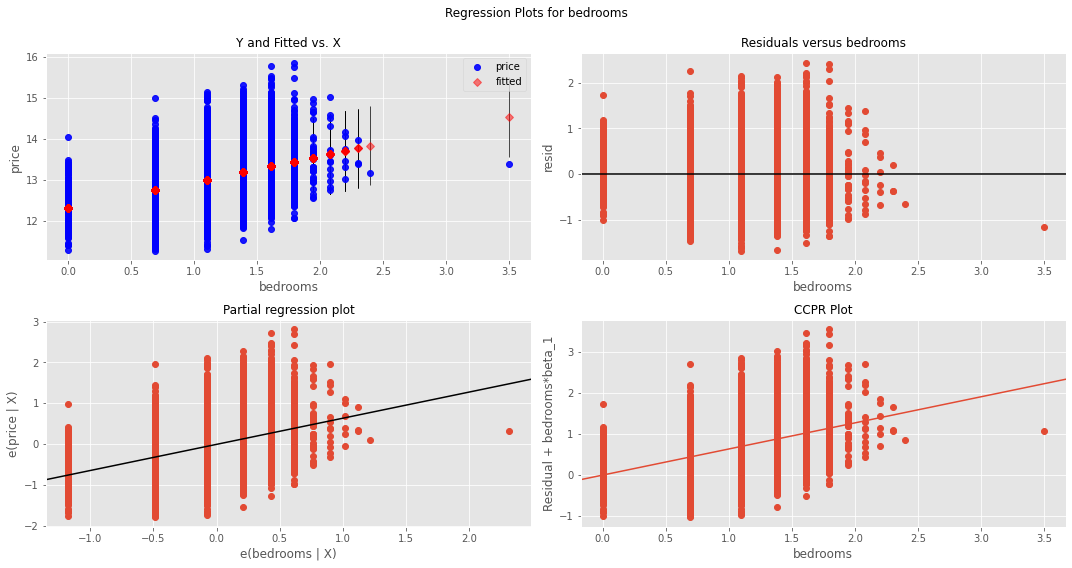

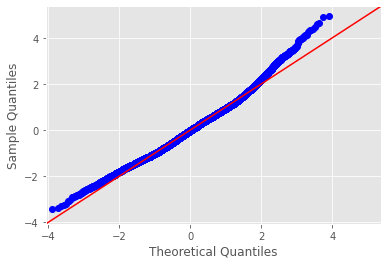

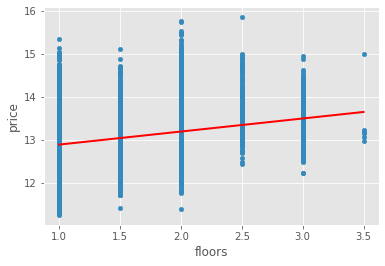

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-sqft_lot
----------------------------------------------------------------------------------------------------


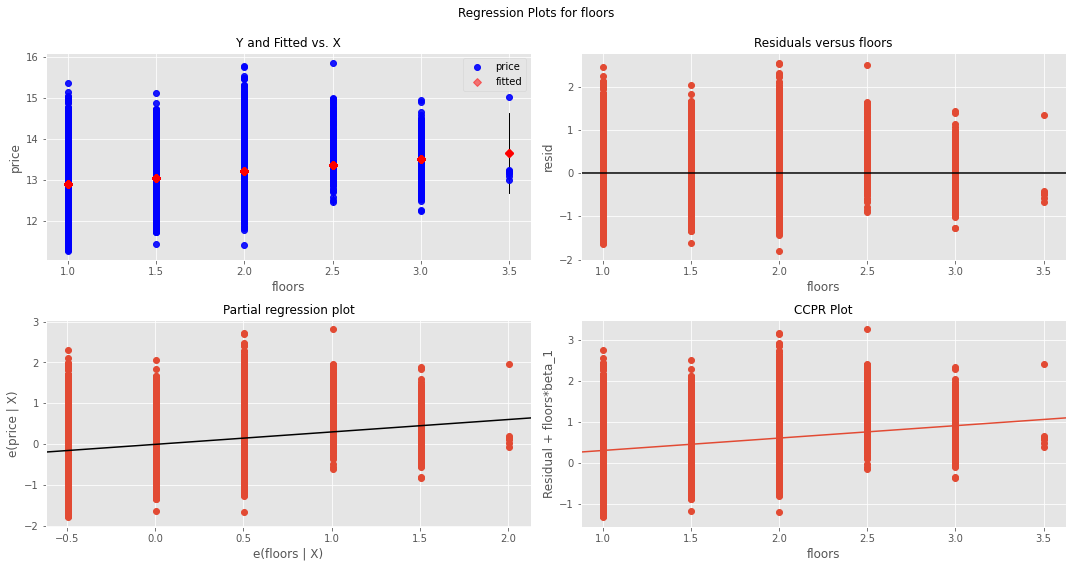

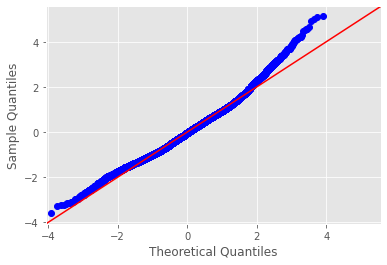

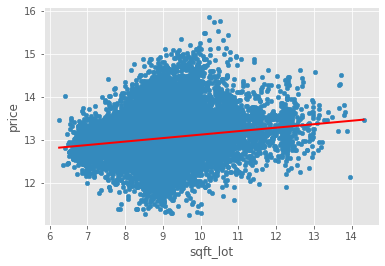

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-price
----------------------------------------------------------------------------------------------------


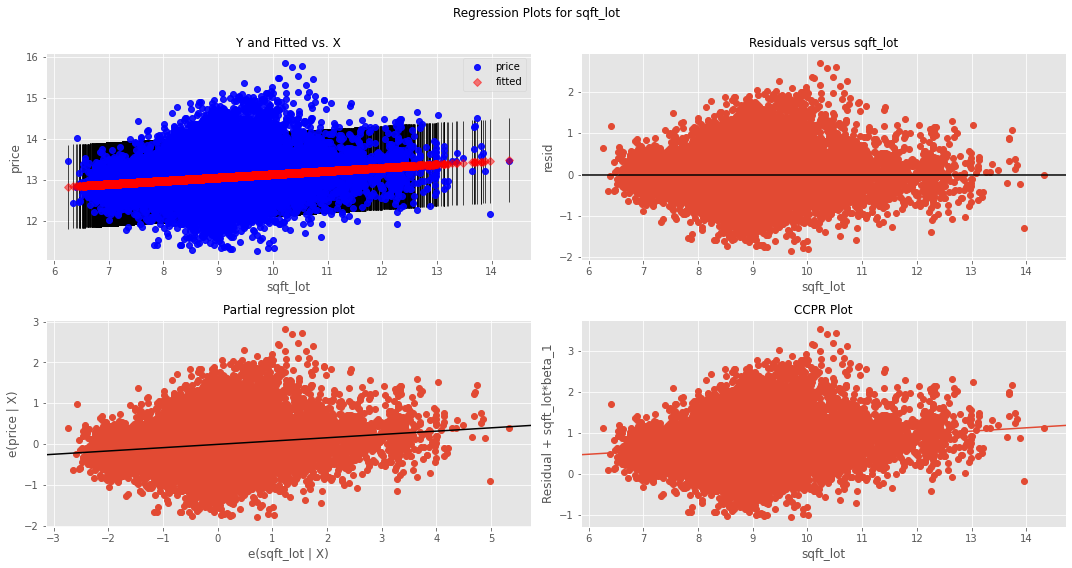

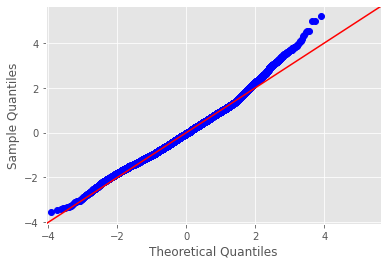

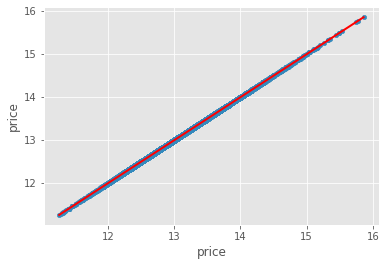

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-sqft_living
----------------------------------------------------------------------------------------------------


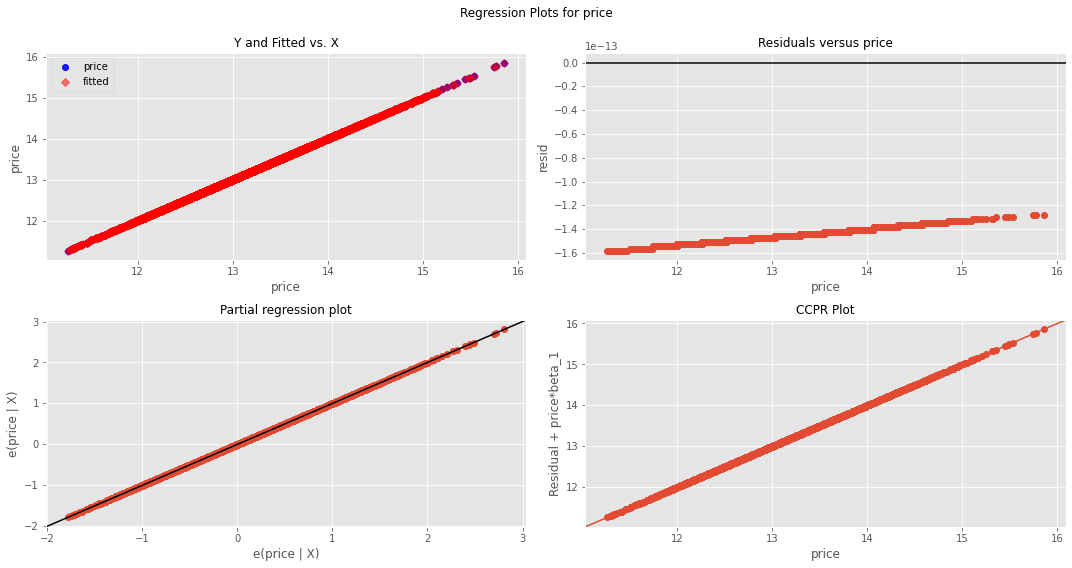

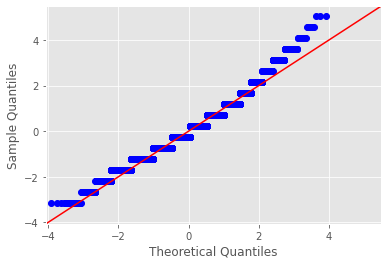

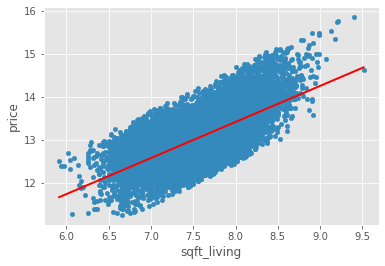

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-sqft_lot15
----------------------------------------------------------------------------------------------------


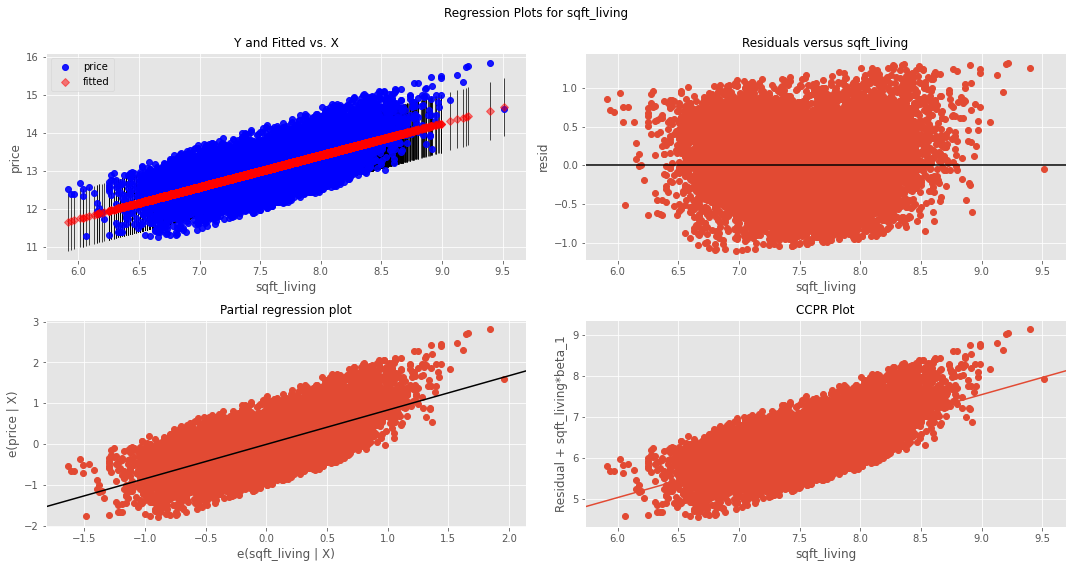

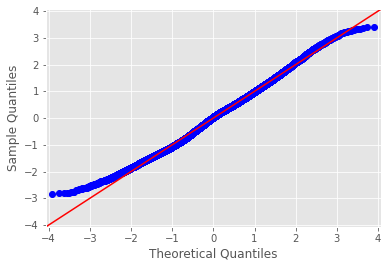

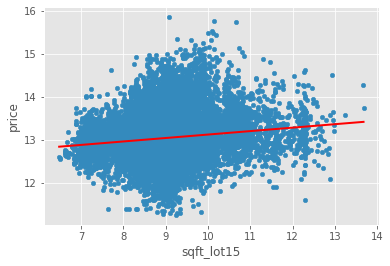

Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-sqft_basement
----------------------------------------------------------------------------------------------------


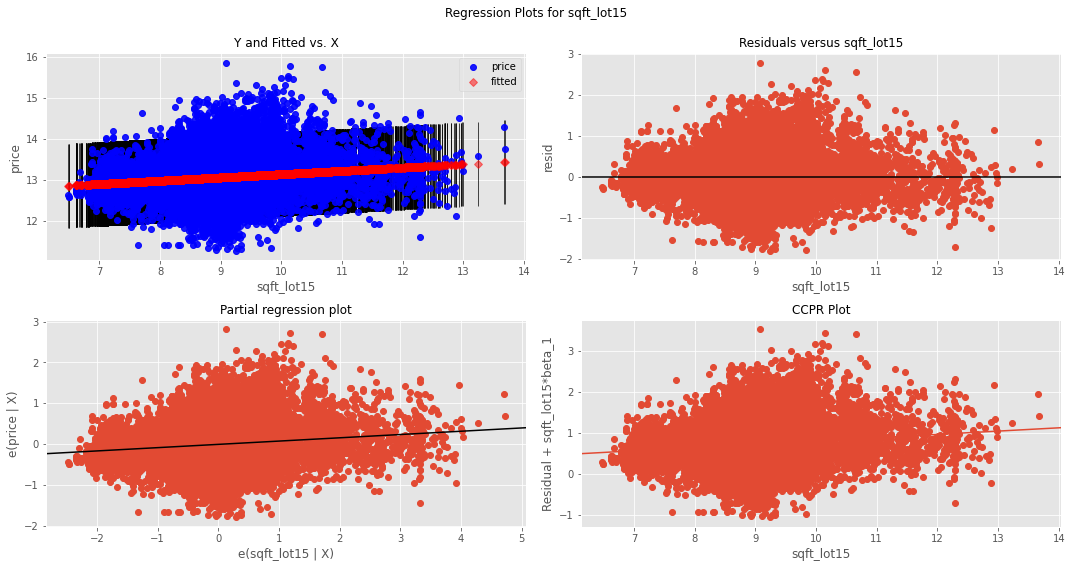

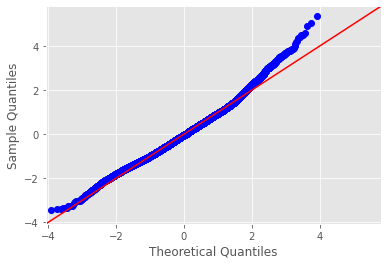

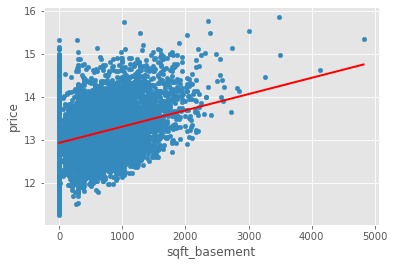

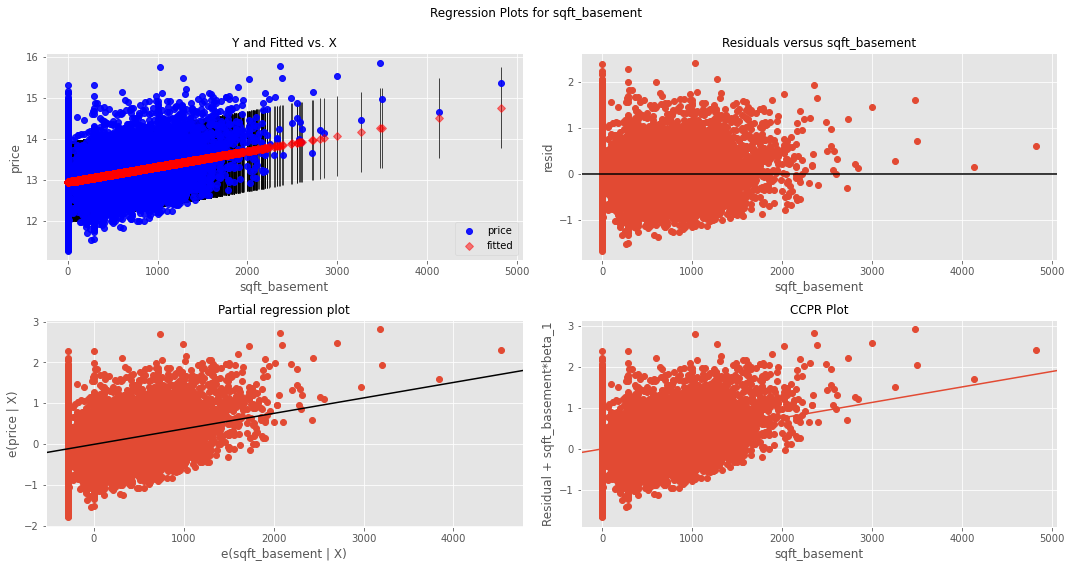

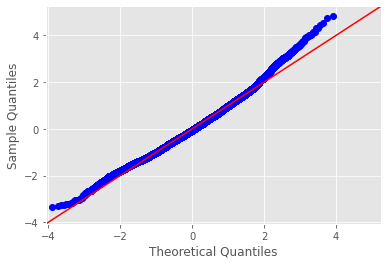

In [463]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

best_attributes = best_attributes.drop(['cond1','cond2','cond3','cond4','cond5'], axis = 1)

for idx, val in enumerate(attributes):
    print ("Northwestern County Housing DataSet -Multiple Regression Analysis and Diagnostics for: price-" + val)
    print ("----------------------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=data_log).fit()
    
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]});
    preds = model.predict(X_new)
    data_log.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   );
    
    

#### Analysing the graphs above:
1) The scatter plots show us only one variable can truly be described as linear, sqft_living.

2) The Q-Q plots show us that all of the variables have normal distribution

3) The residuals plot shows homeoscedasicity among all the variables except for bedrooms.


 Now I will build 4 different models contaning: 3,5,7 and all features respectively. I will use RFE to determine which features to include in my first three model and then I'll print the rsquared values of each model to determine which model is the best.

checking for multicorrelinarity again

In [464]:
data_log.corr()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement
bedrooms,1.000000,0.190985,0.195969,0.342850,0.648121,0.175649,0.280997
floors,0.190985,1.000000,-0.237460,0.310630,0.367564,-0.227223,-0.242358
sqft_lot,0.195969,-0.237460,1.000000,0.138261,0.325983,0.918665,0.092554
price,0.342850,0.310630,0.138261,1.000000,0.674802,0.123710,0.314280
sqft_living,0.648121,0.367564,0.325983,0.674802,1.000000,0.303058,0.418609
sqft_lot15,0.175649,-0.227223,0.918665,0.123710,0.303058,1.000000,0.079549
sqft_basement,0.280997,-0.242358,0.092554,0.314280,0.418609,0.079549,1.000000


i noticed that sqft_lot and sqft_lot15 are correlated.i will be dropping sqft_lot15 because sqft_lot has a lower corr factor

In [465]:
data_log = data_log.drop(['sqft_lot15'],axis=1)

selecting which predictor to use to buld the models

In [466]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

data_f = data_log.drop(['price'], axis = 1)
linreg = LinearRegression()
s1 = RFE(linreg, n_features_to_select = 3)
s1 = s1.fit(data_f, data_log["price"])

s2 =  RFE(linreg, n_features_to_select = 5)
s2 = s2.fit(data_f, data_log["price"])

s3 = RFE(linreg, n_features_to_select = 7)
s3 = s3.fit(data_f, data_log["price"])




In [467]:
data_f.columns

Index(['bedrooms', 'floors', 'sqft_lot', 'sqft_living', 'sqft_basement',
       'cond1', 'cond2', 'cond3', 'cond4', 'cond5'],
      dtype='object')

In [468]:
print(s1.support_)
print(s2.support_)
print(s3.support_)


[False False False False False False False  True  True  True]
[False False False False False  True  True  True  True  True]
[ True False False  True False  True  True  True  True  True]


In [469]:
model1_data = data_log
model1_data = model1_data.drop(['floors', 'sqft_lot','sqft_basement', 'cond1', 'cond3', 'cond4', 'cond5'], axis = 1)
outcome = 'price'
predictor = model1_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model1 = smf.ols(formula = formula, data=model1_data).fit()

model2_data = data_log
model2_data = model2_data.drop(['floors', 'sqft_lot','sqft_basement','cond3', 'cond4',], axis = 1)
outcome = 'price'
predictor = model2_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model2 = smf.ols(formula = formula, data=model2_data).fit()

model3_data = data_log
model3_data = model3_data.drop(['sqft_lot','sqft_basement','cond3'], axis = 1)
outcome = 'price'
predictor = model3_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model3 = smf.ols(formula = formula, data=model3_data).fit()

outcome = 'price'
predictor = data_log.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model4 = smf.ols(formula = formula, data=data_log).fit() 


In [470]:
print('Model 1 Rsquared:', model1.rsquared)
print('Model 2 Rsquared:', model2.rsquared)
print('Model 3 Rsquared:', model3.rsquared)
print('Model 4 Rsquared:', model4.rsquared)

Model 1 Rsquared: 0.47185075125863774
Model 2 Rsquared: 0.47783262168593077
Model 3 Rsquared: 0.4850682926806327
Model 4 Rsquared: 0.4916698069579494


The rsquared gets higher as we add more predictors. Our final model  will be model 3:features that got to the model building stage



In [471]:
best_model = model3

In [472]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2905.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:02:00   Log-Likelihood:                -9624.8
No. Observations:               21597   AIC:                         1.927e+04
Df Residuals:                   21589   BIC:                         1.933e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.1951      0.054    114.980      0.000       6.090       6.301
cond1[T.1]     -0.1006      0.070     -1.430      0.153      -0.238       0.037
cond2[T.1]     -0.1490      0.029     -5.083      0.000      -0.206      -0.092
cond4[T.1]      0.0651      0.006     10.467      0.000       0.053       0.077
cond5[T.1]      0.1892      0.010     19.158      0.000       0.170       0.209
bedrooms       -0.3082      0.012    -25.732      0.000      -0.332      -0.285
floors          0.0876      0.005     16.268      0.000       0.077       0.098
sqft_living     0.9343      0.008    110.815      0.000       0.918       0.951
==============================================================================
Omnibus:                       97.604   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.839
Skew:                           0.152   Prob(JB):                     9.37e-22
Kurtosis:                       2.878   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So in this model we find that the feature that has the most desirable impact on price is sqft_living. 

## Visualizing our best model

In [473]:
print(final_model.rsquared)

0.4850682926806327


The best model paramaters: 
  
 Intercept          6.195141


cond1[T.1]   -0.100598


cond2[T.1]   -0.148985


cond4[T.1]    0.065115


cond5[T.1]    0.189184


bedrooms          -0.308180
floors             0.087599
sqft_living        0.934276

All the features in model 3 are all log normalized features therefore a 1% increase in the independent variable yields the coefficent percent increase in the dependent variable, price.


Increasing square footage of living space by 10% yields an increase of 9.3% in price

Adding a floor, (level) yields an increase of 8% in price

An increase in bedrooms leads to a decrease in house price by 3.0%
